In [17]:
import sktime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
#Replace the path with the path to the dataset
data = pd.read_csv("AirtrafficA4.csv")

map1 = {
    "JAN":1,
    "FEB":2,
    "MAR":3,
    "APR":4,
    "MAY":5,
    "JUNE":6,
    "JULY":7,
    "AUG":8,
    "SEP":9,
    "OCT":10,
    "NOV":11,
    "DEC":12
}
data["MONTH"] = data["MONTH"].str.strip().map(map1) # Mapping the months to numbers
data["DATE"] = pd.to_datetime(data["YEAR"].astype(str) + data["MONTH"].astype(str), format="%Y%m") # Creating a date column

data = data.sort_values(by = "DATE", ascending=True) # Sorted according to date

data["PASSENGERS CARRIED"] = data["PASSENGERS CARRIED"].str.replace(',', '', regex=False).fillna('160000')
complete_data = data
complete_data = complete_data.drop(columns=["YEAR", "MONTH"])
complete_data.reset_index(inplace=True, drop=True)
data = data["PASSENGERS CARRIED"]

data = data.astype(int)

from sktime.forecasting.arima import ARIMA

forecaster = ExponentialSmoothing(data,trend="add", seasonal="add", seasonal_periods=12).fit(optimized=True) # Using ETS model


/Users/kamyak/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kamyak/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [19]:
pd.set_option('display.float_format', '{:.6f}'.format)
y_pred = forecaster.forecast(steps=12)
print(y_pred)


128   7816675.550619
129   7958515.353240
130   7959968.329574
131   8101302.629502
132   8010065.516181
133   7892309.253748
134   8030207.064342
135   8120222.033175
136   8385647.085298
137   8093340.082274
138   8070903.596884
139   8112224.854800
dtype: float64


/Users/kamyak/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kamyak/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 1200x600 with 0 Axes>

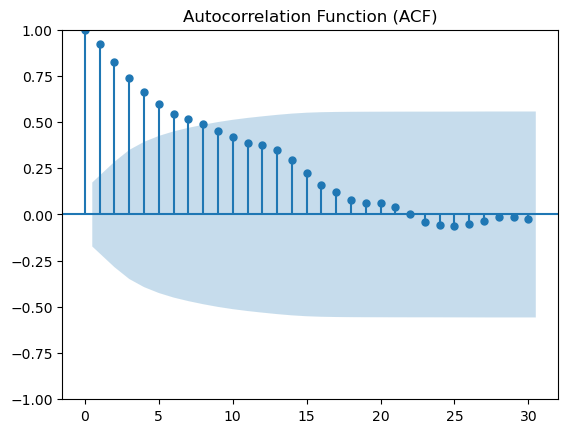

<Figure size 1200x600 with 0 Axes>

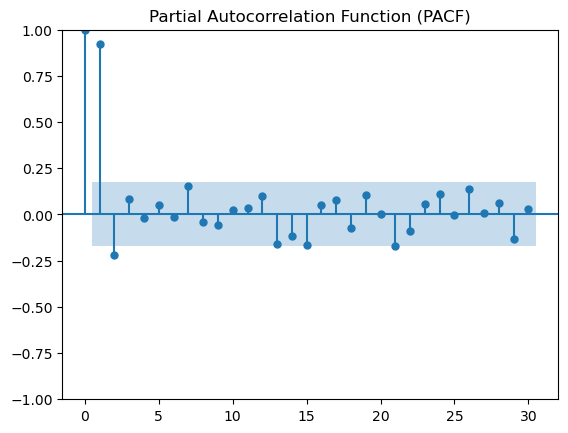

In [20]:

plt.figure(figsize=(12, 6))
plot_acf(data, lags=30)  
plt.title("Autocorrelation Function (ACF)")
plt.show()


plt.figure(figsize=(12, 6))
plot_pacf(data, lags=30) 
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()
